In [1]:
import pandas as pd
import numpy as np

In [2]:
data={"age":[12,23,45,33],"city":["beijing","shanghai","chongqing","wuhan"]}
index=pd.Index(["Mary","Jane","Sue","Kitty"])

In [4]:
user=pd.DataFrame(data=data,index=index)

In [5]:
user

,age,city
Mary,12,beijing
Jane,23,shanghai
Sue,45,chongqing
Kitty,33,wuhan


In [8]:
user.loc[1]

KeyError: 1

In [7]:
user.iloc[1]

age           23
city    shanghai
Name: Jane, dtype: object

In [10]:
user.city

Mary       beijing
Jane      shanghai
Sue      chongqing
Kitty        wuhan
Name: city, dtype: object

In [14]:
user["sex"]=["female","male","male","female"]

In [15]:
user

,age,city,sex
Mary,12,beijing,female
Jane,23,shanghai,male
Sue,45,chongqing,male
Kitty,33,wuhan,female


In [16]:
user.drop(["sex"],axis=1)

,age,city
Mary,12,beijing
Jane,23,shanghai
Sue,45,chongqing
Kitty,33,wuhan


In [17]:
obj={"key1":["a","b","a","a","b"],"key2":["one","two","three","one","two"],
     "data1":np.random.random(5),"data2":np.random.randn(5)}
obj1=pd.DataFrame(obj)

In [20]:
obj1

,key1,key2,data1,data2
0,a,one,0.804660,0.787089
1,b,two,0.350446,0.066398
2,a,three,0.240035,0.608342
3,a,one,0.005760,-0.481993
4,b,two,0.137086,-0.520429


In [28]:
group1=obj1.groupby("key1")
group1.mean()

,data1,data2
key1,,
a,0.350152,0.304479
b,0.243766,-0.227016


In [30]:
group2=obj1.groupby(["key1","key2"])
group2.max()

data1     data2
key1 key2                     
a    one    0.804660  0.787089
     three  0.240035  0.608342
b    two    0.350446  0.066398

In [33]:
f=lambda x,y,z:x*y*z
f(1,2,3)

6

In [34]:
group1.agg(lambda df:df.max()-df.min())

,data1,data2
key1,,
a,0.79890,1.269082
b,0.21336,0.586826


In [35]:
def func(df):
    return df.max()-df.min()

In [36]:
group1.agg(func)

,data1,data2
key1,,
a,0.79890,1.269082
b,0.21336,0.586826


In [37]:
group2.agg(["min","max","mean","count"])

data1                               data2                      \
                 min       max      mean count       min       max      mean   
key1 key2                                                                      
a    one    0.005760  0.804660  0.405210     2 -0.481993  0.787089  0.152548   
     three  0.240035  0.240035  0.240035     1  0.608342  0.608342  0.608342   
b    two    0.137086  0.350446  0.243766     2 -0.520429  0.066398 -0.227016   

                  
           count  
key1 key2         
a    one       2  
     three     1  
b    two       2

In [38]:
obj=pd.read_excel("D:/data1.xlsx")

In [39]:
obj

,NAME,GENDER,ID,SCORE,COUNTRY,JOB
0,Jack,M,1.0,100,US,engineer
1,Mary,F,2.0,100,UK,artist
2,Bob,M,3.0,90,US,manager
3,Susan,F,NaN,95,US,accountant
4,Hill,M,5.0,92,UK,manager
5,Linda,F,6.0,NO,CA,secretary
6,John,M,7.0,86,CA,staff
7,Paul,NaN,NaN,NaN,NaN,NaN
8,Amy,F,9.0,97,US,staff


In [43]:
obj.dropna(axis=0,how="any")

,NAME,GENDER,ID,SCORE,COUNTRY,JOB
0,Jack,M,1.0,100,US,engineer
1,Mary,F,2.0,100,UK,artist
2,Bob,M,3.0,90,US,manager
4,Hill,M,5.0,92,UK,manager
5,Linda,F,6.0,NO,CA,secretary
6,John,M,7.0,86,CA,staff
8,Amy,F,9.0,97,US,staff


In [45]:
obj.fillna(obj.mean())

,NAME,GENDER,ID,SCORE,COUNTRY,JOB
0,Jack,M,1.000000,100,US,engineer
1,Mary,F,2.000000,100,UK,artist
2,Bob,M,3.000000,90,US,manager
3,Susan,F,4.714286,95,US,accountant
4,Hill,M,5.000000,92,UK,manager
5,Linda,F,6.000000,NO,CA,secretary
6,John,M,7.000000,86,CA,staff
7,Paul,NaN,4.714286,NaN,NaN,NaN
8,Amy,F,9.000000,97,US,staff


In [46]:
obj.replace("NO","NaN",inplace=True)

In [47]:
obj

,NAME,GENDER,ID,SCORE,COUNTRY,JOB
0,Jack,M,1.0,100,US,engineer
1,Mary,F,2.0,100,UK,artist
2,Bob,M,3.0,90,US,manager
3,Susan,F,NaN,95,US,accountant
4,Hill,M,5.0,92,UK,manager
5,Linda,F,6.0,NaN,CA,secretary
6,John,M,7.0,86,CA,staff
7,Paul,NaN,NaN,NaN,NaN,NaN
8,Amy,F,9.0,97,US,staff


In [48]:
obj.isna()

,NAME,GENDER,ID,SCORE,COUNTRY,JOB
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,True,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,True,True,True,True,True
8,False,False,False,False,False,False


In [49]:
df=pd.DataFrame({'class':["A","A","B","B","C"],
                 'id':["a","b","c","a","b"],
                 "value":[1,2,3,4,5]})

In [50]:
df

,class,id,value
0,A,a,1
1,A,b,2
2,B,c,3
3,B,a,4
4,C,b,5


In [52]:
df1=df.set_index(["class","id"])
df1

value
class id       
A     a       1
      b       2
B     c       3
      a       4
C     b       5

In [54]:
df1.loc["A"]

,value
id,
a,1
b,2


In [55]:
x=pd.read_csv("D:/year2.csv")

In [56]:
x

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
310,Benin,Sub-Saharan Africa,153,3.484,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,2016
311,Afghanistan,Southern Asia,154,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,2016
312,Togo,Sub-Saharan Africa,155,3.303,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,2016
313,Syria,Middle East and Northern Africa,156,3.069,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,2016


In [57]:
import matplotlib.pyplot as plt

In [58]:
import seaborn as sns 
sns.set()

<AxesSubplot:xlabel='year'>

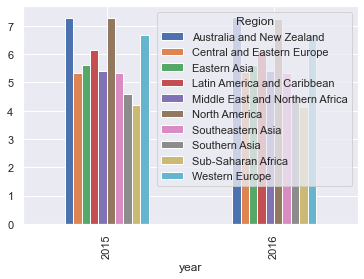

In [65]:
pd.pivot_table(x,index="year",columns="Region", values="Happiness Score").plot(kind="bar")

In [68]:
pd.pivot_table(x,index="Region",columns="year", values="Happiness Score",aggfunc=[np.mean,np.median,min,max,np.std])

mean           median            min  \
year                                 2015      2016   2015    2016   2015   
Region                                                                      
Australia and New Zealand        7.285000  7.323500  7.285  7.3235  7.284   
Central and Eastern Europe       5.332931  5.370690  5.286  5.4880  4.218   
Eastern Asia                     5.626167  5.624167  5.729  5.6465  4.874   
Latin America and Caribbean      6.144682  6.101750  6.149  6.1260  4.518   
Middle East and Northern Africa  5.406900  5.386053  5.262  5.3030  3.006   
North America                    7.273000  7.254000  7.273  7.2540  7.119   
Southeastern Asia                5.317444  5.338889  5.360  5.2790  3.819   
Southern Asia                    4.580857  4.563286  4.565  4.6430  3.575   
Sub-Saharan Africa               4.202800  4.136421  4.272  4.1300  2.839   
Western Europe                   6.689619  6.685667  6.937  6.9070  4.857   

                                          max              std            
year                              2016   2015   2016      2015      2016  
Region                                                                    
Australia and New Zealand        7.313  7.286  7.334  0.001414  0.014849  
Central and Eastern Europe       4.217  6.505  6.596  0.570446  0.590395  
Eastern Asia                     4.907  6.298  6.379  0.554053  0.526885  
Latin America and Caribbean      4.028  7.226  7.087  0.728560  0.725680  
Middle East and Northern Africa  3.069  7.278  7.267  1.101382  1.057559  
North America                    7.104  7.427  7.404  0.217789  0.212132  
Southeastern Asia                3.907  6.798  6.739  0.950020  0.930686  
Southern Asia                    3.360  5.253  5.196  0.570526  0.616190  
Sub-Saharan Africa               2.905  5.477  5.648  0.609557  0.558494  
Western Europe                   5.033  7.587  7.526  0.824582  0.789190